In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# !wget https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/Yo1uIagOTPBGqA -O ../models/model-sentinel_vgg_nofreeze_bs80_ne20_lr0.0001-16.pth

In [3]:
# !wget https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/l2ioWDXYbb9SMw -O ../models/model-from_scratch_total_nofreeze_bs80_ne20_lr0.0001-19.pth

In [4]:
from inference import *
import numpy as np
from PIL import Image

In [5]:
# model = get_model('../models/model-from_scratch_total_nofreeze_bs80_ne20_lr0.0001-19.pth', device='cpu') # to run on a machine without GPU
model_scratch = get_model('../models/model-from_scratch_total_nofreeze_bs80_ne20_lr0.0001-19.pth')
model_pretrain = get_model('../models/model-sentinel_vgg_nofreeze_bs80_ne20_lr0.0001-16.pth')

In [6]:
folder = '../examples/'
example_1 = 'bulgaria_dospat_s2cloudless_2017.jpg' 
example_2 = 'switzerland_bodensee_s2cloudless_2018.jpg' 
example_3 = 'germany_starnberger_see_s2cloudless_2017.jpg'
example = example_3

I = np.asarray(Image.open(folder + example))

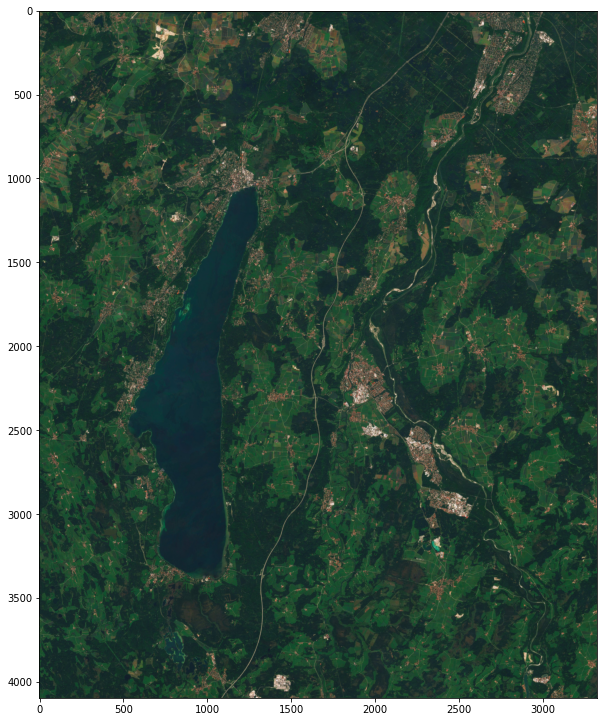

In [7]:
plt.figure(figsize=(10,29))
plt.imshow(I)

In [8]:
res_scratch = inference(model_scratch, I)
res_pretrain = inference(model_pretrain, I)

In [9]:
w_scratch = draw_mask(I, res_scratch)
w_pretrain = draw_mask(I, res_pretrain)

In [10]:
Image.fromarray(w_scratch).save(folder + example.split(".")[-2] + '_scratch' + '.jpg')
Image.fromarray(w_pretrain).save(folder + example.split(".")[-2] + '_pretrain' + '.jpg')

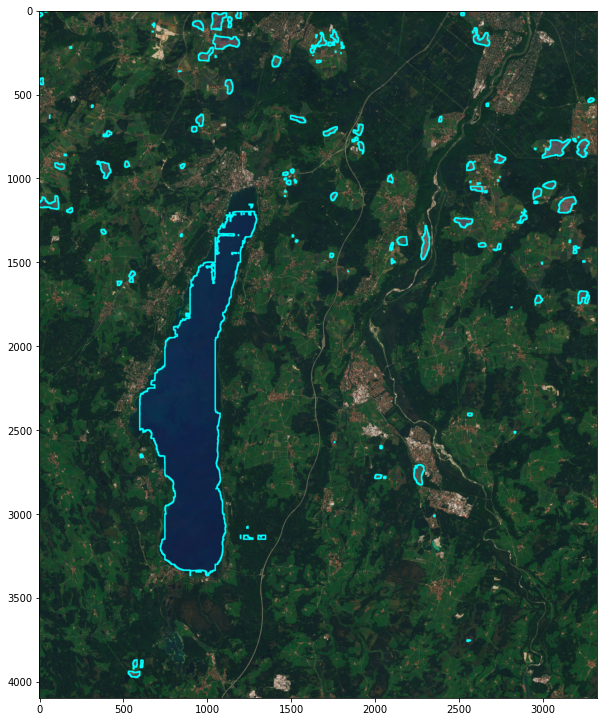

In [11]:
plt.figure(figsize=(10,29))
plt.imshow(w_scratch)

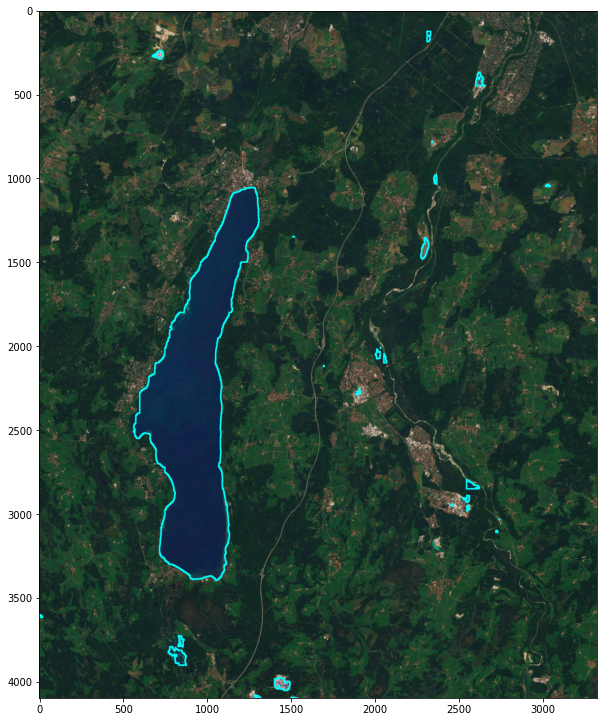

In [12]:
plt.figure(figsize=(10,29))
plt.imshow(w_pretrain)